# Q1

In [13]:
import numpy as np
import scipy as sp
from skimage import io, color
import matplotlib.pyplot as plt

image.shape=(2268, 4032, 3)


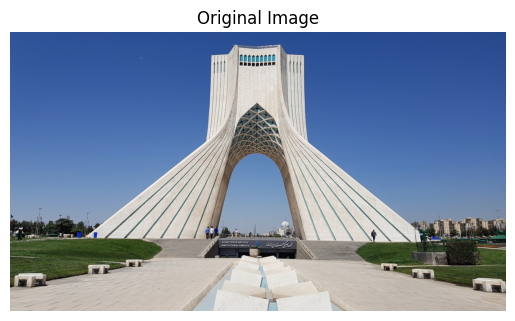

In [14]:
image = plt.imread("image1.jpg")
print(f'{image.shape=}')
plt.title('Original Image')
plt.axis(False)
plt.imshow(image)

In [15]:
kernel1 = np.array([
    [1, 2, 1],
    [2, 4, 2],
    [1, 2, 1]
]) / 16

kernel1

array([[0.0625, 0.125 , 0.0625],
       [0.125 , 0.25  , 0.125 ],
       [0.0625, 0.125 , 0.0625]])

In [16]:
pad_width = ((1, 1), (1, 1), (0, 0))
padded_image = np.pad(image, pad_width=pad_width, mode='edge') # replicate pad
padded_image.shape

(2270, 4034, 3)

In [17]:
blurred_image = np.zeros_like(image)
blurred_image[..., 0] = sp.signal.convolve2d(padded_image[..., 0], kernel1, 'valid')
blurred_image[..., 1] = sp.signal.convolve2d(padded_image[..., 1], kernel1, 'valid')
blurred_image[..., 2] = sp.signal.convolve2d(padded_image[..., 2], kernel1, 'valid')
blurred_image.shape

(2268, 4032, 3)

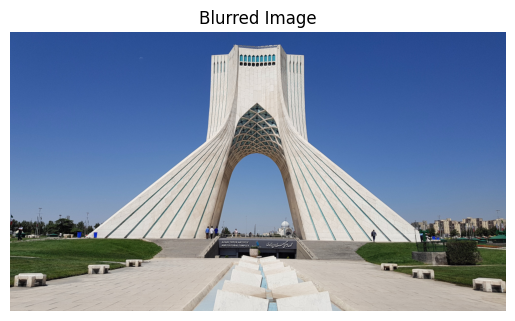

In [18]:
plt.axis(False)
plt.title("Blurred Image")
plt.imshow(blurred_image)

In [19]:
def apply_kernel(img: np.ndarray, kernel: np.ndarray):
    ker_h, ker_w = kernel.shape

    # replicate pad
    pad_width = ((ker_h//2, ker_w//2), (ker_h//2, ker_w//2), (0, 0))
    padded_image = np.pad(image, pad_width=pad_width, mode='edge')

    # convolve image with kernel
    convolved_image = np.zeros_like(image)
    convolved_image[..., 0] = sp.signal.convolve2d(padded_image[..., 0], kernel, 'valid')
    convolved_image[..., 1] = sp.signal.convolve2d(padded_image[..., 1], kernel, 'valid')
    convolved_image[..., 2] = sp.signal.convolve2d(padded_image[..., 2], kernel, 'valid')

    return convolved_image

In [20]:
kernel2 = np.ones((3, 3)) / 9
kernel2

array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]])

In [21]:
kernel3 = np.ones((3, 3))
kernel3[1, 1] += 1
kernel3 /= 10
kernel3

array([[0.1, 0.1, 0.1],
       [0.1, 0.2, 0.1],
       [0.1, 0.1, 0.1]])

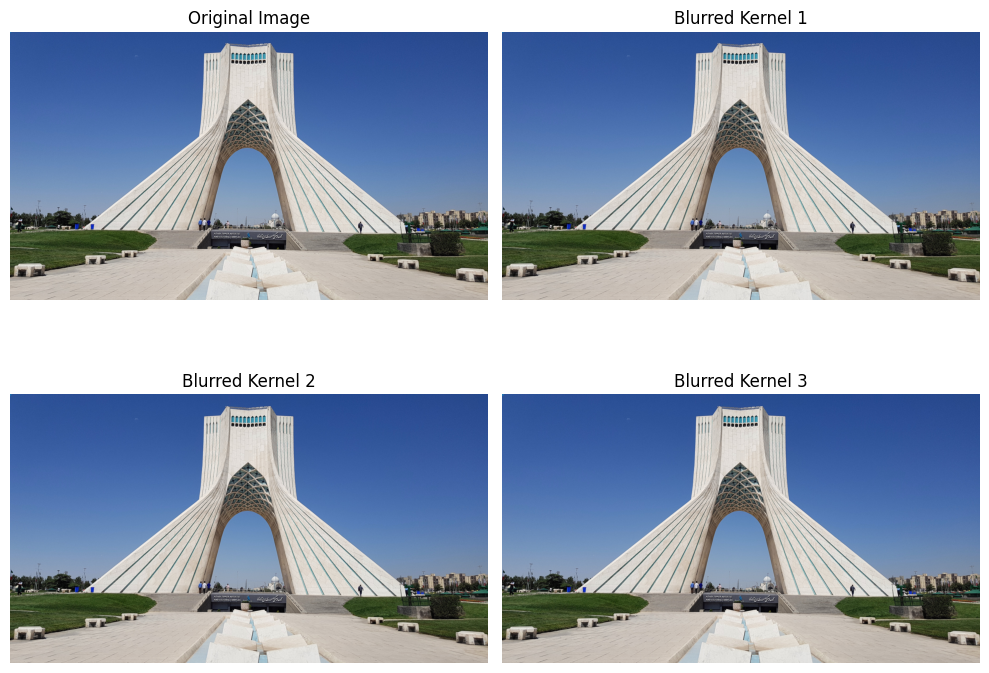

In [22]:
# Create a figure with 4 subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Plot on each subplot
for i, ax in enumerate(axs.flat):
    ax.plot([0, 1], [0, 1])  # Example plot data

# Add titles to subplots
axs[0, 0].set_title('Original Image')
axs[0, 0].axis(False)
axs[0, 0].imshow(image)
axs[0, 1].set_title('Blurred Kernel 1')
axs[0, 1].axis(False)
axs[0, 1].imshow(apply_kernel(image, kernel1))
axs[1, 0].set_title('Blurred Kernel 2')
axs[1, 0].axis(False)
axs[1, 0].imshow(apply_kernel(image, kernel2))
axs[1, 1].set_title('Blurred Kernel 3')
axs[1, 1].axis(False)
axs[1, 1].imshow(apply_kernel(image, kernel3))

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

# Q2

image2.shape=(295, 295, 3)


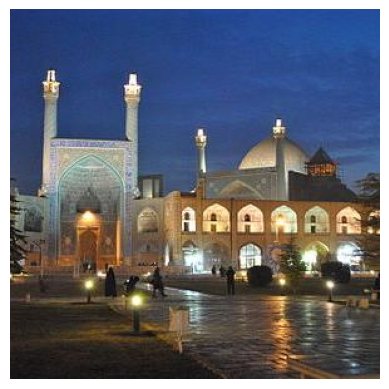

In [23]:
image2 = plt.imread('image2.jpg')
print(f'{image2.shape=}')
plt.axis(False)
plt.imshow(image2)

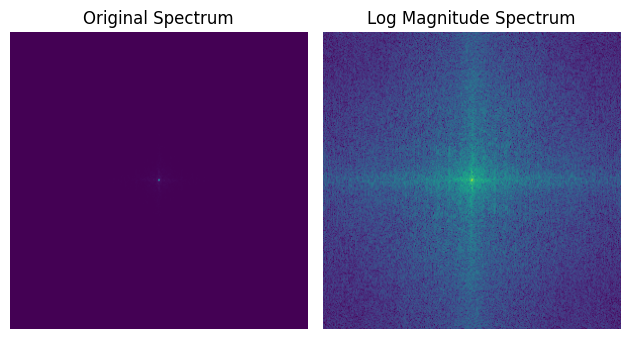

In [28]:
image2_gray = color.rgb2gray(image2)
image2_fft = np.fft.fftshift(np.fft.fft2(image2_gray))

# Display the FFT magnitude spectrum and log of it
fig, axs = plt.subplots(1, 2)

axs[0].imshow(np.abs(image2_fft), cmap='viridis')
axs[0].set_title('Original Spectrum')
axs[0].axis('off')

axs[1].imshow(np.log(1 + np.abs(image2_fft)), cmap='viridis')
axs[1].set_title('Log Magnitude Spectrum')
axs[1].axis('off')

plt.tight_layout()
plt.show()

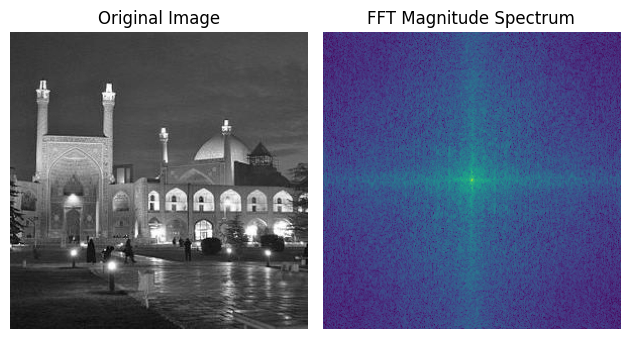

In [29]:
# Display the original image and its FFT magnitude spectrum
fig, axs = plt.subplots(1, 2)

axs[0].imshow(image2_gray, cmap='gray')
axs[0].set_title('Original Image')
axs[0].axis('off')

axs[1].imshow(np.log(1 + np.abs(image2_fft)), cmap='viridis')
axs[1].set_title('FFT Magnitude Spectrum')
axs[1].axis('off')

plt.tight_layout()
plt.show()

In [26]:
image2.shape

(295, 295, 3)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import io

image_filename = "image2.jpg"

def calculate_2dft(input):
    ft = np.fft.ifftshift(input)
    ft = np.fft.fft2(ft)
    return np.fft.fftshift(ft)

def calculate_2dift(input):
    ift = np.fft.ifftshift(input)
    ift = np.fft.ifft2(ift)
    ift = np.fft.fftshift(ift)
    return ift.real

def calculate_distance_from_centre(coords, centre):
    return np.sqrt((coords[0] - centre) ** 2 + (coords[1] - centre) ** 2)

def find_symmetric_coordinates(coords, centre):
    return (centre + (centre - coords[0]), centre + (centre - coords[1]))

def create_frame(individual_grating, reconstruction, idx):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    ax1.set_title("Frequency")
    ax1.imshow(individual_grating, cmap='gray')
    ax1.axis("off")
    ax2.set_title("Reconstructed Image")
    ax2.imshow(reconstruction, cmap='gray')
    ax2.axis("off")
    plt.suptitle(f"Terms: {idx}")
    
    buf = io.BytesIO()
    plt.savefig(buf, format='png')
    plt.close(fig)
    buf.seek(0)
    return Image.open(buf)

# Read and process image
image = plt.imread(image_filename)
image = image[:, :, :3].mean(axis=2)  # Convert to grayscale

# Array dimensions (array is square) and centre pixel
array_size = min(image.shape) - 1 + min(image.shape) % 2

# Crop image so it's a square image
image = image[:array_size, :array_size]
centre = int((array_size - 1) / 2)

coords_left_half = ((x, y) for x in range(array_size) for y in range(centre+1))
coords_left_half = sorted(coords_left_half, key=lambda x: calculate_distance_from_centre(x, centre))

ft = calculate_2dft(image)

# Reconstruct image
rec_image = np.zeros(image.shape)
individual_grating = np.zeros(image.shape, dtype="complex")
idx = 0

display_all_until = 100
display_step = 500
next_display = display_all_until + display_step

frames = []

for coords in coords_left_half:
    if not (coords[1] == centre and coords[0] > centre):
        idx += 1
        symm_coords = find_symmetric_coordinates(coords, centre)
        
        individual_grating[coords] = ft[coords]
        individual_grating[symm_coords] = ft[symm_coords]

        rec_grating = calculate_2dift(individual_grating)
        rec_image += rec_grating

        individual_grating[coords] = 0
        individual_grating[symm_coords] = 0

        if idx < display_all_until or idx == next_display:
            if idx > display_all_until:
                next_display += display_step
                display_step += 10
            frames.append(create_frame(rec_grating, rec_image, idx))

# Save frames as GIF
frames[0].save('fourier_synthesis.gif', save_all=True, append_images=frames[1:], optimize=False, duration=100, loop=0)